# Programmbeispiel: Finite Differenzen (1D) höherer Ordnung

In diesem Beispiel lösen wir das Problem
$$
-u''(x) = f(x), x \in (a,b)
$$
mit Randwerten $u(a) = u_a, u(b) = u_b$. Damit wir konkret arbeiten können, wählen wir das Einheitsintervall $a=0, b=1$ und b

*Fall A*: Die Lösung 
$$ u(x) = -\frac{1}{6} x^3 +\frac{7}{6} x$$
ergibt sich für die rechte Seite $f(x)=x$ und Randwerte $u(0)=0, u(1)=1$. (Mit einem Verfahren 4. Ordnung kann diese Lösung exakt dargestellt werden!)

In [1]:
#f=inline("x")
#mysolution = inline("-(x.*x.*x)/6.0 + 7.0*x/6.0")
#ua= 0.0
#ub= 1.0

*Fall B*: Die Lösung 
$$ u(x) = \cos 4\pi x $$
ergibt sich für die rechte Seite $f(x) = (4\pi)^2 \cos 4\pi x$ und Randwerte $u(0)=u(1)=1$ 

In [2]:
f =@(x)(16.0*pi*pi*cos(4*pi*x))
mysolution = @(x)(cos(4*pi*x))
ua= 1.0
ub= 1.0

f =

@(x) (16.0 * pi * pi * cos (4 * pi * x))

mysolution =

@(x) (cos (4 * pi * x))

ua = 1
ub = 1


In [3]:
xa = 0.0
xb = 1.0



NumCells = 20
NumPoints = NumCells +1

# Gitterweite
h = (xb-xa)/NumCells

# Koordinaten
x = linspace(xa, xb, NumPoints)

xa = 0
xb = 1
NumCells = 20
NumPoints = 21
h = 0.050000
x =

 Columns 1 through 8:

        0   0.0500   0.1000   0.1500   0.2000   0.2500   0.3000   0.3500

 Columns 9 through 16:

   0.4000   0.4500   0.5000   0.5500   0.6000   0.6500   0.7000   0.7500

 Columns 17 through 21:

   0.8000   0.8500   0.9000   0.9500   1.0000



## Teilaufgabe a): Schritt für Schritt zum LGS
Wir approximieren $-u''(x)$ durch ein Differenz, die bis auf $O(h^4)$ genau ist. 
Dazu initialisieren wir für **innere Knoten** die Matrix und rechte Seite mit
$$
\frac{1}{12}(1 u_{i-2} -16 u_{i-1} + 30 u_i - 16 u_{i+1} + 1 u_{i+1}) = h^2 f_i
$$
In der Nachbarschaft des Randes ($i=1$ und $i=M-1$) verwenden wir zur Vereinfachung die bekannte Approximation zweiter Ordnung:
$$
 (-u_{i-1} + 2 u_i - u_{i+1}) = h^2 f_i
$$


In [4]:

function A=init_matrix(NumPoints)
A=zeros(NumPoints,NumPoints);

for i=1:NumPoints

    if (((i==1) || (i==NumPoints)))
    
    
    elseif ((i==2) || (i==NumPoints-1))
      A(i,i-1) = -1;
      A(i,i) = 2;
      A(i,i+1) = -1; 
    else 
      A(i,i-2) = 1.0/12.0;
      A(i,i-1) = -16.0/12.0;
      A(i,i) = 30.0/12.0;
      A(i,i+1) = -16.0/12.0;
      A(i,i+2) = 1.0/12.0;
    end
    
endfor

endfunction
A =init_matrix(NumPoints)
b = (h*h)*f(x(:))

A =

 Columns 1 through 8:

        0        0        0        0        0        0        0        0
  -1.0000   2.0000  -1.0000        0        0        0        0        0
   0.0833  -1.3333   2.5000  -1.3333   0.0833        0        0        0
        0   0.0833  -1.3333   2.5000  -1.3333   0.0833        0        0
        0        0   0.0833  -1.3333   2.5000  -1.3333   0.0833        0
        0        0        0   0.0833  -1.3333   2.5000  -1.3333   0.0833
        0        0        0        0   0.0833  -1.3333   2.5000  -1.3333
        0        0        0        0        0   0.0833  -1.3333   2.5000
        0        0        0        0        0        0   0.0833  -1.3333
        0        0        0        0        0        0        0   0.0833
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0     

An den Stellen, an denen **Dirichlet-Randwerte** vorliegen, wird in der Matrix eine Einheitszeile gesetzt und die rechte Seite angepasst:

In [5]:
function [A,b] = set_dirichlet(i, ui, A, b)
    b(i) = ui;
    A(i,:) = 0;
    A(i,i) = 1;
endfunction

[A,b] = set_dirichlet(1, ua, A, b);
[A,b] = set_dirichlet(NumPoints, ub, A, b)

A =

 Columns 1 through 8:

   1.0000        0        0        0        0        0        0        0
  -1.0000   2.0000  -1.0000        0        0        0        0        0
   0.0833  -1.3333   2.5000  -1.3333   0.0833        0        0        0
        0   0.0833  -1.3333   2.5000  -1.3333   0.0833        0        0
        0        0   0.0833  -1.3333   2.5000  -1.3333   0.0833        0
        0        0        0   0.0833  -1.3333   2.5000  -1.3333   0.0833
        0        0        0        0   0.0833  -1.3333   2.5000  -1.3333
        0        0        0        0        0   0.0833  -1.3333   2.5000
        0        0        0        0        0        0   0.0833  -1.3333
        0        0        0        0        0        0        0   0.0833
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0     

In [6]:
f([0, 0])

ans =

   157.91   157.91



**Neumann-Randbedingungen** 
Gegeben sei die Neumann-Bedingung am linken Rand:
$$
\frac{\partial u}{\partial n} = - u'(x_0) = -g
$$


In der Gleichung
$$
\frac{u_0-2u_1 + u_2}{h^2} = f_1 $$
eliminiert man den (Ghost-)Wert $u_0$ mittels

$$
\frac{u_2-u_0}{2h} = -g \Leftrightarrow  u_0 = u_2 + 2gh
$$
und erhält 
$$\frac{u_2- u_1}{h} =  \frac{h}{2}f_1 - g $$
bzw.
$$ (u_2- u_1) =  \frac{h^2}{2}f_1 - g h $$
Aus Symmetriegründen gilt die Updateformel auch am rechten Rand, wobei das Vorzeichen des Normalenvektors zu beachten ist.

In [7]:
function [A,b] = add_neumann(i, ghi, A, b)
    A(i,i) += -1.0;
    b(i) *=0.5;
    b(i) += ghi;
endfunction

% [A,b] = add_neumann(1, -h*1.0, A, b);

Die numerische Lösung kann nun über ein lineares Gleichungssystem bestimmt werden:

In [8]:
u = linsolve(A,b);

Wir wollen numerische und analytische Lösung gegenüberstellen:

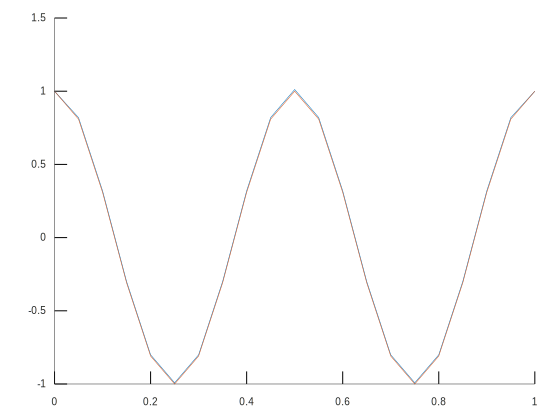

In [9]:
%plot -f svg
hold on
sol = mysolution(x(:));

plot(x, u)
plot(x, sol)

Den Fehler berechnen wir in den Punkten $x_i$:

In [10]:
einf=norm(u-sol, inf)

einf = 0.011436


## Aufgabenteil c): Studie zur Diskretisierungsgenauigkeit

In [32]:
function [h, herr]=discretization_error(f, NumPoints, xLeft, uLeft, xRight, uRight, uref )

    # Gitterweite
    h = (xRight - xLeft)/(NumPoints-1);
    # Koordinaten
    x = linspace(xLeft, xRight, NumPoints);
    
    # Aufstellen des LGS
    A = init_matrix(NumPoints);
    h
    b = f(x(:));
    b *= (h*h);
    u = zeros(NumPoints,1);
    
    [A,b] = set_dirichlet(1, uLeft, A, b);
    [A,b] = set_dirichlet(NumPoints, uRight, A, b);
    
    tic()
    u = linsolve(A,b);
    toc()
    
    sol = uref(x(:));
    err = u -sol
    herr=norm(err, inf)
    
    hold on
    plot(x(:), sol)
    plot(x(:), u)
    
endfunction


h = 0.2500
Elapsed time is 0.000199795 seconds.
err =

        0
  -4.3447
  -2.8199
  -4.3447
        0

herr = 4.3447
h = 0.1667
Elapsed time is 9.20296e-05 seconds.
err =

        0
  -0.7272
  -0.7611
  -0.5087
  -0.7611
  -0.7272
        0

herr = 0.7611
h = 0.1000
Elapsed time is 8.60691e-05 seconds.
err =

          0
   0.037246
   0.013563
   0.013843
   0.041444
   0.058491
   0.041444
   0.013843
   0.013563
   0.037246
          0

herr = 0.058491
h = 0.055556
Elapsed time is 9.08375e-05 seconds.
err =

          0
   0.014503
   0.014086
   0.012457
   0.011349
   0.011349
   0.012463
   0.014170
   0.015671
   0.016263
   0.015671
   0.014170
   0.012463
   0.011349
   0.011349
   0.012457
   0.014086
   0.014503
          0

herr = 0.016263
h = 0.029412
Elapsed time is 0.000194073 seconds.
err =

            0
   1.5135e-03
   1.5835e-03
   1.5313e-03
   1.4594e-03
   1.3845e-03
   1.3171e-03
   1.2664e-03
   1.2392e-03
   1.2392e-03
   1.2664e-03
   1.3171e-03
   1.3845

   3.4372e-08
   3.4343e-08
   3.4312e-08
   3.4278e-08
   3.4242e-08
   3.4204e-08
   3.4164e-08
   3.4121e-08
   3.4077e-08
   3.4030e-08
   3.3982e-08
   3.3931e-08
   3.3878e-08
   3.3823e-08
   3.3767e-08
   3.3708e-08
   3.3648e-08
   3.3585e-08
   3.3521e-08
   3.3456e-08
   3.3388e-08
   3.3319e-08
   3.3248e-08
   3.3175e-08
   3.3101e-08
   3.3026e-08
   3.2949e-08
   3.2870e-08
   3.2791e-08
   3.2709e-08
   3.2627e-08
   3.2543e-08
   3.2459e-08
   3.2373e-08
   3.2286e-08
   3.2198e-08
   3.2109e-08
   3.2019e-08
   3.1928e-08
   3.1836e-08
   3.1744e-08
   3.1651e-08
   3.1557e-08
   3.1463e-08
   3.1368e-08
   3.1273e-08
   3.1177e-08
   3.1081e-08
   3.0984e-08
   3.0888e-08
   3.0791e-08
   3.0694e-08
   3.0597e-08
   3.0500e-08
   3.0403e-08
   3.0306e-08
   3.0209e-08
   3.0113e-08
   3.0017e-08
   2.9921e-08
   2.9825e-08
   2.9730e-08
   2.9636e-08
   2.9542e-08
   2.9448e-08
   2.9356e-08
   2.9264e-08
   2.9172e-08
   2.9082e-08
   2.8992e-08
   2.8904e-08
   2.8

   2.0758e-09
   2.0733e-09
   2.0708e-09
   2.0683e-09
   2.0658e-09
   2.0633e-09
   2.0607e-09
   2.0581e-09
   2.0555e-09
   2.0529e-09
   2.0502e-09
   2.0476e-09
   2.0449e-09
   2.0422e-09
   2.0395e-09
   2.0367e-09
   2.0340e-09
   2.0312e-09
   2.0284e-09
   2.0256e-09
   2.0228e-09
   2.0200e-09
   2.0171e-09
   2.0143e-09
   2.0114e-09
   2.0085e-09
   2.0057e-09
   2.0027e-09
   1.9998e-09
   1.9969e-09
   1.9940e-09
   1.9910e-09
   1.9881e-09
   1.9851e-09
   1.9821e-09
   1.9791e-09
   1.9762e-09
   1.9732e-09
   1.9702e-09
   1.9671e-09
   1.9641e-09
   1.9611e-09
   1.9581e-09
   1.9550e-09
   1.9520e-09
   1.9490e-09
   1.9459e-09
   1.9429e-09
   1.9398e-09
   1.9368e-09
   1.9337e-09
   1.9307e-09
   1.9276e-09
   1.9246e-09
   1.9215e-09
   1.9184e-09
   1.9154e-09
   1.9123e-09
   1.9093e-09
   1.9063e-09
   1.9032e-09
   1.9002e-09
   1.8971e-09
   1.8941e-09
   1.8911e-09
   1.8881e-09
   1.8850e-09
   1.8820e-09
   1.8790e-09
   1.8760e-09
   1.8731e-09
   1.8

   1.8672e-09
   1.8643e-09
   1.8613e-09
   1.8584e-09
   1.8554e-09
   1.8525e-09
   1.8496e-09
   1.8467e-09
   1.8438e-09
   1.8409e-09
   1.8381e-09
   1.8352e-09
   1.8324e-09
   1.8295e-09
   1.8267e-09
   1.8239e-09
   1.8211e-09
   1.8184e-09
   1.8156e-09
   1.8129e-09
   1.8102e-09
   1.8075e-09
   1.8048e-09
   1.8021e-09
   1.7995e-09
   1.7969e-09
   1.7943e-09
   1.7917e-09
   1.7891e-09
   1.7866e-09
   1.7841e-09
   1.7816e-09
   1.7791e-09
   1.7766e-09
   1.7742e-09
   1.7718e-09
   1.7694e-09
   1.7670e-09
   1.7647e-09
   1.7624e-09
   1.7601e-09
   1.7578e-09
   1.7556e-09
   1.7534e-09
   1.7512e-09
   1.7490e-09
   1.7469e-09
   1.7448e-09
   1.7427e-09
   1.7406e-09
   1.7386e-09
   1.7366e-09
   1.7347e-09
   1.7327e-09
   1.7308e-09
   1.7289e-09
   1.7271e-09
   1.7253e-09
   1.7235e-09
   1.7217e-09
   1.7200e-09
   1.7183e-09
   1.7166e-09
   1.7150e-09
   1.7134e-09
   1.7118e-09
   1.7102e-09
   1.7087e-09
   1.7073e-09
   1.7058e-09
   1.7044e-09
   1.7

   1.0805e-10
   1.0807e-10
   1.0808e-10
   1.0810e-10
   1.0811e-10
   1.0813e-10
   1.0815e-10
   1.0817e-10
   1.0819e-10
   1.0821e-10
   1.0823e-10
   1.0825e-10
   1.0828e-10
   1.0830e-10
   1.0832e-10
   1.0835e-10
   1.0837e-10
   1.0840e-10
   1.0842e-10
   1.4552e-11
   1.4556e-11
   1.4561e-11
   1.4565e-11
   1.4570e-11
   1.4574e-11
   1.4579e-11
   1.4584e-11
   1.4589e-11
   1.4594e-11
   1.4600e-11
   1.4605e-11
   1.4611e-11
   1.4616e-11
   1.4622e-11
   1.4628e-11
   1.4634e-11
   1.4640e-11
   1.4646e-11
   1.4653e-11
   1.4659e-11
   1.4665e-11
   1.4672e-11
   1.4679e-11
   1.4686e-11
   1.4693e-11
   1.4700e-11
   1.4707e-11
   1.4714e-11
   1.4722e-11
   1.4729e-11
   1.4736e-11
   1.4743e-11
   1.4750e-11
   1.4758e-11
   1.4765e-11
   1.4772e-11
   1.4780e-11
   1.4787e-11
   1.4795e-11
   1.4802e-11
   1.4810e-11
   1.4818e-11
   1.4826e-11
   1.4834e-11
   1.4842e-11
   1.4850e-11
   1.4858e-11
   1.4862e-11
   1.4865e-11
   1.4868e-11
   1.4871e-11
   1.4

   8.1454e-12
   8.1314e-12
   8.1191e-12
   8.1067e-12
   8.0945e-12
   8.0822e-12
   8.0688e-12
   8.0568e-12
   8.0448e-12
   8.0328e-12
   8.0209e-12
   8.0091e-12
   7.9974e-12
   7.9855e-12
   7.9737e-12
   7.9620e-12
   7.9505e-12
   7.9374e-12
   7.9259e-12
   7.9143e-12
   7.9030e-12
   7.8917e-12
   7.8791e-12
   7.8682e-12
   7.8572e-12
   7.8464e-12
   7.8356e-12
   7.8249e-12
   7.8142e-12
   7.8022e-12
   7.7917e-12
   7.7813e-12
   7.7709e-12
   7.7590e-12
   7.7486e-12
   7.7384e-12
   7.7282e-12
   7.7180e-12
   7.7064e-12
   7.6966e-12
   7.6867e-12
   7.6769e-12
   7.6671e-12
   7.6574e-12
   7.6478e-12
   7.6381e-12
   7.6286e-12
   7.6191e-12
   7.6099e-12
   7.5990e-12
   7.5898e-12
   7.5807e-12
   7.5717e-12
   7.5628e-12
   7.5523e-12
   7.5436e-12
   7.5350e-12
   7.5265e-12
   7.5182e-12
   7.5098e-12
   7.5016e-12
   7.4933e-12
   7.4851e-12
   7.4753e-12
   7.4671e-12
   7.4589e-12
   7.4492e-12
   7.4410e-12
   7.4329e-12
   7.4248e-12
   7.4151e-12
   7.4

  -4.0339e-12
  -4.0253e-12
  -4.0167e-12
  -4.0078e-12
  -3.9990e-12
  -3.9903e-12
  -3.9814e-12
  -3.9725e-12
  -3.9633e-12
  -3.9542e-12
  -3.9452e-12
  -3.9365e-12
  -3.9277e-12
  -3.9190e-12
  -3.9103e-12
  -3.9020e-12
  -3.8933e-12
  -3.8848e-12
  -3.8766e-12
  -3.8684e-12
  -3.8601e-12
  -3.8520e-12
  -3.8440e-12
  -3.8365e-12
  -3.8288e-12
  -3.8212e-12
  -3.8116e-12
  -3.8021e-12
  -3.7926e-12
  -3.7830e-12
  -3.7731e-12
  -3.7629e-12
  -3.7530e-12
  -3.7428e-12
  -3.7323e-12
  -3.7221e-12
  -3.7120e-12
  -3.7017e-12
  -3.6915e-12
  -3.6813e-12
  -3.6712e-12
  -3.6612e-12
  -3.6513e-12
  -3.6415e-12
  -3.6317e-12
  -3.6219e-12
  -3.6123e-12
  -3.6028e-12
  -3.5933e-12
  -3.5840e-12
  -3.5750e-12
  -3.5660e-12
  -3.5573e-12
  -3.5485e-12
  -3.5398e-12
  -3.5315e-12
  -3.5233e-12
  -3.5149e-12
  -3.5063e-12
  -3.4953e-12
  -3.4839e-12
  -3.4726e-12
  -3.4611e-12
  -3.4496e-12
  -3.4378e-12
  -3.4260e-12
  -3.4142e-12
  -3.4022e-12
  -3.3898e-12
  -3.3772e-12
  -3.3643e-12
  -3.3

   6.8886e-12
   6.9119e-12
   6.9353e-12
   6.9586e-12
   6.9821e-12
   7.0053e-12
   7.0288e-12
   7.0520e-12
   7.0755e-12
   7.0988e-12
   7.1222e-12
   7.1454e-12
   7.1689e-12
   7.1921e-12
   7.2156e-12
   7.2388e-12
   7.2622e-12
   7.2854e-12
   7.3088e-12
   7.3320e-12
   7.3554e-12
   7.3786e-12
   7.4020e-12
   7.4252e-12
   7.4489e-12
   7.4720e-12
   7.4954e-12
   7.5186e-12
   7.5420e-12
   7.5652e-12
   7.5886e-12
   7.6117e-12
   7.6351e-12
   7.6583e-12
   7.6817e-12
   7.7048e-12
   7.7282e-12
   7.7513e-12
   7.7747e-12
   7.7979e-12
   7.8212e-12
   7.8444e-12
   7.8678e-12
   7.8909e-12
   7.9143e-12
   7.9375e-12
   7.9608e-12
   7.9840e-12
   8.0074e-12
   8.0305e-12
   8.0539e-12
   8.0771e-12
   8.1005e-12
   8.1236e-12
   8.1470e-12
   8.1704e-12
   8.1936e-12
   8.2170e-12
   8.2401e-12
   8.2635e-12
   8.2867e-12
   8.3101e-12
   8.3333e-12
   8.3566e-12
   8.3789e-12
   8.4014e-12
   8.4237e-12
   8.4462e-12
   8.4684e-12
   8.4908e-12
   8.5130e-12
   8.5

   1.7184e-11
   1.7191e-11
   1.7197e-11
   1.7204e-11
   1.7211e-11
   1.7218e-11
   1.7225e-11
   1.7231e-11
   1.7238e-11
   1.7245e-11
   1.7252e-11
   1.7259e-11
   1.7266e-11
   1.7274e-11
   1.7281e-11
   1.7288e-11
   1.7296e-11
   1.7304e-11
   1.7312e-11
   1.7319e-11
   1.7327e-11
   1.7336e-11
   1.7344e-11
   1.7352e-11
   1.7360e-11
   1.7369e-11
   1.7377e-11
   1.7386e-11
   1.7395e-11
   1.7404e-11
   1.7413e-11
   1.7422e-11
   1.7432e-11
   1.7441e-11
   1.7451e-11
   1.7460e-11
   1.7470e-11
   1.7480e-11
   1.7489e-11
   1.7499e-11
   1.7510e-11
   1.7520e-11
   1.7530e-11
   1.7540e-11
   1.7551e-11
   1.7561e-11
   1.7572e-11
   1.7582e-11
   1.7593e-11
   1.7604e-11
   1.7614e-11
   1.7625e-11
   1.7636e-11
   1.7647e-11
   1.7658e-11
   1.7669e-11
   1.7681e-11
   1.7692e-11
   1.7703e-11
   1.7714e-11
   1.7726e-11
   1.7737e-11
   1.7749e-11
   1.7761e-11
   1.7772e-11
   1.7785e-11
   1.7797e-11
   1.7809e-11
   1.7821e-11
   1.7834e-11
   1.7847e-11
   1.7

   5.4045e-12
   5.4229e-12
   5.4412e-12
   5.4597e-12
   5.4781e-12
   5.4962e-12
   5.5144e-12
   5.5325e-12
   5.5502e-12
   5.5678e-12
   5.5854e-12
   5.6030e-12
   5.6203e-12
   5.6375e-12
   5.6547e-12
   5.6718e-12
   5.6886e-12
   5.7049e-12
   5.7211e-12
   5.7373e-12
   5.7532e-12
   5.7689e-12
   5.7846e-12
   5.8000e-12
   5.8152e-12
   5.8300e-12
   5.8451e-12
   5.8596e-12
   5.8741e-12
   5.8883e-12
   5.9023e-12
   5.9162e-12
   5.9296e-12
   5.9428e-12
   5.9561e-12
   5.9691e-12
   5.9819e-12
   5.9943e-12
   6.0069e-12
   6.0195e-12
   6.0320e-12
   6.0441e-12
   6.0565e-12
   6.0691e-12
   6.0812e-12
   6.0933e-12
   6.1051e-12
   6.1170e-12
   6.1288e-12
   6.1405e-12
   6.1519e-12
   6.1635e-12
   6.1748e-12
   6.1859e-12
   6.1969e-12
   6.2080e-12
   6.2187e-12
   6.2291e-12
   6.2393e-12
   6.2497e-12
   6.2597e-12
   6.2697e-12
   6.2794e-12
   6.2889e-12
   6.2982e-12
   6.3074e-12
   6.3163e-12
   6.3254e-12
   6.3343e-12
   6.3429e-12
   6.3515e-12
   6.3

   4.1601e-12
   4.1235e-12
   4.0866e-12
   4.0508e-12
   4.0139e-12
   3.9774e-12
  -5.2697e-12
  -5.2603e-12
  -5.2521e-12
  -5.2440e-12
  -5.2348e-12
  -5.2267e-12
  -5.2175e-12
  -5.2098e-12
  -5.2010e-12
  -5.1935e-12
  -5.1846e-12
  -5.1772e-12
  -5.1700e-12
  -5.1616e-12
  -5.1545e-12
  -5.1463e-12
  -5.1396e-12
  -5.1316e-12
  -5.1249e-12
  -5.1185e-12
  -5.1109e-12
  -5.1048e-12
  -5.0973e-12
  -5.0911e-12
  -5.0838e-12
  -5.0778e-12
  -5.0707e-12
  -5.0647e-12
  -5.0590e-12
  -5.0521e-12
  -5.0463e-12
  -5.0393e-12
  -5.0338e-12
  -5.0271e-12
  -5.0214e-12
  -5.0160e-12
  -5.0095e-12
  -5.0043e-12
  -4.9979e-12
  -4.9927e-12
  -4.9863e-12
  -4.9812e-12
  -4.9749e-12
  -4.9700e-12
  -4.9654e-12
  -4.9595e-12
  -4.9547e-12
  -4.9490e-12
  -4.9447e-12
  -4.9393e-12
  -4.9349e-12
  -4.9307e-12
  -4.9254e-12
  -4.9213e-12
  -4.9162e-12
  -4.9122e-12
  -4.9073e-12
  -4.9036e-12
  -4.9000e-12
  -4.8955e-12
  -4.8922e-12
  -4.8880e-12
  -4.8849e-12
  -4.8809e-12
  -4.8782e-12
  -4.8

  -1.2819e-11
  -1.2839e-11
  -1.2860e-11
  -1.2881e-11
  -1.2901e-11
  -1.2922e-11
  -1.2943e-11
  -1.2964e-11
  -1.2985e-11
  -1.3007e-11
  -1.3029e-11
  -1.3050e-11
  -1.3072e-11
  -1.3093e-11
  -1.3113e-11
  -1.3133e-11
  -1.3153e-11
  -1.3172e-11
  -1.3191e-11
  -1.3211e-11
  -1.3230e-11
  -1.3249e-11
  -1.3268e-11
  -1.3286e-11
  -1.3305e-11
  -1.3323e-11
  -1.3341e-11
  -1.3359e-11
  -1.3377e-11
  -1.3396e-11
  -1.3414e-11
  -1.3433e-11
  -1.3452e-11
  -1.3472e-11
  -1.3491e-11
  -1.3511e-11
  -1.3530e-11
  -1.3550e-11
  -1.3570e-11
  -1.3590e-11
  -1.3608e-11
  -1.3626e-11
  -1.3644e-11
  -1.3661e-11
  -1.3678e-11
  -1.3695e-11
  -1.3712e-11
  -1.3728e-11
  -1.3744e-11
  -1.3759e-11
  -1.3775e-11
  -1.3790e-11
  -1.3806e-11
  -1.3822e-11
  -1.3838e-11
  -1.3854e-11
  -1.3870e-11
  -1.3887e-11
  -1.3903e-11
  -1.3920e-11
  -1.3936e-11
  -1.3953e-11
  -1.3970e-11
  -1.3987e-11
  -1.4004e-11
  -1.4022e-11
  -1.4039e-11
  -1.4056e-11
  -1.4073e-11
  -1.4087e-11
  -1.4100e-11
  -1.4

  -1.3909e-11
  -1.3892e-11
  -1.3876e-11
  -1.3860e-11
  -1.3843e-11
  -1.3826e-11
  -1.3810e-11
  -1.3793e-11
  -1.3777e-11
  -1.3761e-11
  -1.3745e-11
  -1.3729e-11
  -1.3714e-11
  -1.3698e-11
  -1.3682e-11
  -1.3667e-11
  -1.3652e-11
  -1.3636e-11
  -1.3621e-11
  -1.3606e-11
  -1.3591e-11
  -1.3576e-11
  -1.3561e-11
  -1.3547e-11
  -1.3532e-11
  -1.3518e-11
  -1.3503e-11
  -1.3489e-11
  -1.3474e-11
  -1.3460e-11
  -1.3446e-11
  -1.3432e-11
  -1.3418e-11
  -1.3404e-11
  -1.3390e-11
  -1.3377e-11
  -1.3363e-11
  -1.3349e-11
  -1.3336e-11
  -1.3323e-11
  -1.3310e-11
  -1.3296e-11
  -1.3283e-11
  -1.3270e-11
  -1.3258e-11
  -1.3245e-11
  -1.3232e-11
  -1.3220e-11
  -1.3208e-11
  -1.3195e-11
  -1.3183e-11
  -1.3171e-11
  -1.3159e-11
  -1.3147e-11
  -1.3135e-11
  -1.3123e-11
  -1.3111e-11
  -1.3100e-11
  -1.3088e-11
  -1.3076e-11
  -1.3064e-11
  -1.3052e-11
  -1.3036e-11
  -1.3018e-11
  -1.3001e-11
  -1.2983e-11
  -1.2966e-11
  -1.2948e-11
  -1.2930e-11
  -1.2912e-11
  -1.2894e-11
  -1.2

  -2.1658e-12
  -2.1414e-12
  -2.1170e-12
  -2.0927e-12
  -2.0685e-12
  -2.0443e-12
  -2.0201e-12
  -1.9960e-12
  -1.9721e-12
  -1.9481e-12
  -1.9239e-12
  -1.8999e-12
  -1.8759e-12
  -1.8519e-12
  -1.8280e-12
  -1.8041e-12
  -1.7803e-12
  -1.7566e-12
  -1.7331e-12
  -1.7095e-12
  -1.6860e-12
  -1.6625e-12
  -1.6391e-12
  -1.6158e-12
  -1.5926e-12
  -1.5696e-12
  -1.5464e-12
  -1.5232e-12
  -1.5001e-12
  -1.4765e-12
  -1.4485e-12
  -1.4202e-12
  -1.3918e-12
  -1.3634e-12
  -1.3349e-12
  -1.3064e-12
  -1.2779e-12
  -1.2493e-12
  -1.2205e-12
  -1.1916e-12
  -1.1628e-12
  -1.1339e-12
  -1.1051e-12
  -1.0761e-12
  -1.0473e-12
  -1.0185e-12
  -9.8965e-13
  -9.6079e-13
  -9.3203e-13
  -9.0328e-13
  -8.7452e-13
  -8.4588e-13
  -8.1724e-13
  -7.8870e-13
  -7.6023e-13
  -7.3186e-13
  -7.0366e-13
  -6.7529e-13
  -6.4704e-13
  -6.1884e-13
  -5.9064e-13
  -5.6249e-13
  -5.3441e-13
  -5.0643e-13
  -4.7840e-13
  -4.5036e-13
  -4.2233e-13
  -3.9446e-13
  -3.6654e-13
  -3.3873e-13
  -3.1092e-13
  -2.8

   2.9645e-11
   2.9644e-11
   2.9643e-11
   2.9643e-11
   2.9642e-11
   2.9642e-11
   2.9642e-11
   2.9642e-11
   2.9641e-11
   2.9642e-11
   2.9642e-11
   2.9642e-11
   2.9642e-11
   2.9643e-11
   2.9644e-11
   2.9644e-11
   2.9645e-11
   2.9645e-11
   2.9646e-11
   2.9647e-11
   2.9648e-11
   2.9648e-11
   2.9649e-11
   2.9650e-11
   2.9651e-11
   2.9653e-11
   2.9654e-11
   2.9656e-11
   2.9657e-11
   2.9659e-11
   2.9661e-11
   2.9663e-11
   2.9665e-11
   2.9667e-11
   2.9669e-11
   2.9671e-11
   2.9673e-11
   2.9675e-11
   2.9678e-11
   2.9680e-11
   2.9683e-11
   2.9686e-11
   2.9689e-11
   2.9691e-11
   2.9695e-11
   2.9697e-11
   2.9701e-11
   2.9704e-11
   2.9708e-11
   2.9711e-11
   2.9715e-11
   2.9718e-11
   2.9722e-11
   2.9726e-11
   2.9730e-11
   2.9734e-11
   2.9738e-11
   2.9742e-11
   2.9747e-11
   2.9751e-11
   2.9755e-11
   2.9760e-11
   2.9765e-11
   2.9770e-11
   2.9775e-11
   2.9780e-11
   2.9785e-11
   2.9790e-11
   2.9795e-11
   2.9801e-11
   2.9806e-11
   2.9

  -3.8646e-11
  -3.8681e-11
  -3.8716e-11
  -3.8751e-11
  -3.8786e-11
  -3.8821e-11
  -3.8855e-11
  -3.8890e-11
  -3.8925e-11
  -3.8960e-11
  -3.8994e-11
  -3.9028e-11
  -3.9063e-11
  -3.9098e-11
  -3.9132e-11
  -3.9166e-11
  -3.9201e-11
  -3.9235e-11
  -3.9269e-11
  -3.9304e-11
  -3.9338e-11
  -3.9372e-11
  -3.9406e-11
  -3.9440e-11
  -3.9475e-11
  -3.9508e-11
  -3.9542e-11
  -3.9577e-11
  -3.9611e-11
  -3.9644e-11
  -3.9678e-11
  -3.9713e-11
  -3.9747e-11
  -3.9780e-11
  -3.9814e-11
  -3.9848e-11
  -3.9881e-11
  -3.9915e-11
  -3.9949e-11
  -3.9983e-11
  -4.0016e-11
  -4.0050e-11
  -4.0084e-11
  -4.0118e-11
  -4.0151e-11
  -4.0184e-11
  -4.0218e-11
  -4.0252e-11
  -4.0284e-11
  -4.0318e-11
  -4.0351e-11
  -4.0385e-11
  -4.0417e-11
  -4.0451e-11
  -4.0484e-11
  -4.0516e-11
  -4.0550e-11
  -4.0583e-11
  -4.0616e-11
  -4.0648e-11
  -4.0681e-11
  -4.0714e-11
  -4.0747e-11
  -4.0779e-11
  -4.0812e-11
  -4.0845e-11
  -4.0877e-11
  -4.0909e-11
  -4.0942e-11
  -4.0974e-11
  -4.1006e-11
  -4.1

   1.7743e-11
   1.7781e-11
   1.7818e-11
   1.7855e-11
   1.7892e-11
   1.7929e-11
   1.7966e-11
   1.8003e-11
   1.8040e-11
   1.8077e-11
   1.8115e-11
   1.8151e-11
   1.8188e-11
   1.8225e-11
   1.8262e-11
   1.8298e-11
   1.8335e-11
   1.8372e-11
   1.8409e-11
   1.8445e-11
   1.8482e-11
   1.8518e-11
   1.8554e-11
   1.8590e-11
   1.8627e-11
   1.8663e-11
   1.8698e-11
   1.8734e-11
   1.8769e-11
   1.8805e-11
   1.8840e-11
   1.8875e-11
   1.8911e-11
   1.8946e-11
   1.8981e-11
   1.9016e-11
   1.9051e-11
   1.9086e-11
   1.9121e-11
   1.9156e-11
   1.9191e-11
   1.9225e-11
   1.9260e-11
   1.9294e-11
   1.9329e-11
   1.9363e-11
   1.9397e-11
   1.9432e-11
   1.9467e-11
   1.9500e-11
   1.9535e-11
   1.9569e-11
   1.9603e-11
   1.9637e-11
   1.9671e-11
   1.9705e-11
   1.9739e-11
   1.9773e-11
   1.9807e-11
   1.9841e-11
   1.9875e-11
   1.9909e-11
   1.9943e-11
   1.9977e-11
   2.0010e-11
   2.0044e-11
   2.0078e-11
   2.0111e-11
   2.0144e-11
   2.0178e-11
   2.0212e-11
   2.0

  -9.8602e-12
  -9.8840e-12
  -9.9081e-12
  -9.9315e-12
  -9.9553e-12
  -9.9787e-12
  -1.0002e-11
  -1.0025e-11
  -1.0049e-11
  -1.0071e-11
  -1.0095e-11
  -1.0117e-11
  -1.0140e-11
  -1.0163e-11
  -1.0185e-11
  -1.0207e-11
  -1.0230e-11
  -1.0251e-11
  -1.0273e-11
  -1.0294e-11
  -1.0316e-11
  -1.0337e-11
  -1.0358e-11
  -1.0379e-11
  -1.0400e-11
  -1.0421e-11
  -1.0442e-11
  -1.0462e-11
  -1.0483e-11
  -1.0504e-11
  -1.0524e-11
  -1.0545e-11
  -1.0565e-11
  -1.0586e-11
  -1.0606e-11
  -1.0626e-11
  -1.0646e-11
  -1.0666e-11
  -1.0686e-11
  -1.0705e-11
  -1.0725e-11
  -1.0744e-11
  -1.0762e-11
  -1.0781e-11
  -1.0799e-11
  -1.0817e-11
  -1.0836e-11
  -1.0854e-11
  -1.0872e-11
  -1.0890e-11
  -1.0908e-11
  -1.0926e-11
  -1.0944e-11
  -1.0962e-11
  -1.0980e-11
  -1.0997e-11
  -1.1015e-11
  -1.1032e-11
  -1.1049e-11
  -1.1066e-11
  -1.1083e-11
  -1.1100e-11
  -1.1117e-11
  -1.1133e-11
  -1.1150e-11
  -1.1166e-11
  -1.1182e-11
  -1.1198e-11
  -1.1214e-11
  -1.1230e-11
  -1.1246e-11
  -1.1

  -6.8309e-11
  -6.8272e-11
  -6.8236e-11
  -6.8199e-11
  -6.8162e-11
  -6.8126e-11
  -6.8089e-11
  -6.8052e-11
  -6.8016e-11
  -6.7979e-11
  -6.7944e-11
  -6.7907e-11
  -6.7870e-11
  -6.7834e-11
  -6.7797e-11
  -6.7760e-11
  -6.7725e-11
  -6.7688e-11
  -6.7653e-11
  -6.7616e-11
  -6.7580e-11
  -6.7545e-11
  -6.7508e-11
  -6.7471e-11
  -6.7436e-11
  -6.7400e-11
  -6.7363e-11
  -6.7328e-11
  -6.7292e-11
  -6.7257e-11
  -6.7221e-11
  -6.7184e-11
  -6.7149e-11
  -6.7113e-11
  -6.7077e-11
  -6.7042e-11
  -6.7006e-11
  -6.6972e-11
  -6.6935e-11
  -6.6899e-11
  -6.6865e-11
  -6.6829e-11
  -6.6793e-11
  -6.6759e-11
  -6.6723e-11
  -6.6687e-11
  -6.6653e-11
  -6.6617e-11
  -6.6583e-11
  -6.6547e-11
  -6.6511e-11
  -6.6478e-11
  -6.6442e-11
  -6.6406e-11
  -6.6373e-11
  -6.6337e-11
  -6.6303e-11
  -6.6268e-11
  -6.6232e-11
  -6.6199e-11
  -6.6163e-11
  -6.6128e-11
  -6.6094e-11
  -6.6059e-11
  -6.6024e-11
  -6.5991e-11
  -6.5956e-11
  -6.5922e-11
  -1.1936e-11
  -1.1884e-11
  -1.1833e-11
  -1.1

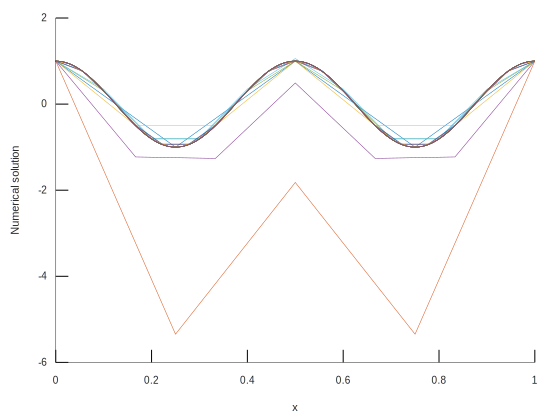

In [33]:
for k=1:14
    [hGrid(k), hErr(k)] = discretization_error(f, 2**k+3, xa, ua, xb, ub, mysolution);
endfor 

xlabel("x")
ylabel("Numerical solution")

hGrid(:)
hErr(:)

## Fehlerdarstellung
Die Approximation 4. Ordnung führt auch zu einer Konvergenz der Lösung $$\|u-u_h\|$$ die im Wesentlichen 4. Ordnung ist. Für sehr kleine $h$ weicht das Verhalten ab. Dies kann z.B. an Rundungsfehlern liegen.

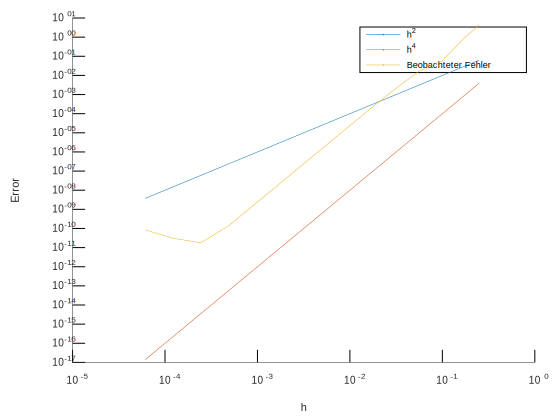

In [34]:
hold on
loglog(hGrid,hGrid.*hGrid) # Model
loglog(hGrid,hGrid.*hGrid.*hGrid.*hGrid) # Model
loglog(hGrid,hErr)             # Data

legend ({"h^2", "h^4", "Beobachteter Fehler"});
xlabel("h")
ylabel("Error")
hold off

## Aufgabenteil d)

Für $k>12$ wird die Zeit spürbar. Die Laufzeit geht mit $O(N^3)$. 